# Import Module

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import optuna

from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss
from xgboost import XGBClassifier

# Import Data

In [4]:
train = pd.read_parquet("train.parquet")
train.head()

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,adr,required_car_parking_spaces,...,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_Spring,season_Summer,season_Winter
0,1,1.082077,-0.793444,2.370654,-0.258811,-0.08708,-0.161708,-0.37404,1.869500,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,1.623363,-0.673744,-0.456737
1,0,0.074579,-0.793444,0.293007,2.284752,-0.08708,-0.161708,-0.37404,0.948517,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,-0.616005,1.484243,-0.456737
2,1,0.074579,-0.793444,0.293007,4.828315,-0.08708,-0.161708,-0.37404,3.368774,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,-0.616005,-0.673744,-0.456737
3,1,1.082077,0.797756,0.293007,-0.258811,-0.08708,-0.161708,-0.37404,-0.257328,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,1.623363,-0.673744,-0.456737
4,0,0.074579,-0.793444,0.293007,-0.258811,-0.08708,-0.161708,-0.37404,-1.269766,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,-0.616005,-0.673744,2.189446


In [5]:
valid = pd.read_parquet('valid.parquet')
valid.head()

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,adr,required_car_parking_spaces,...,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_Spring,season_Summer,season_Winter
0,0,1.082077,-1.323844,-1.784639,-0.258811,-0.08708,-0.161708,-0.37404,0.241716,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,-0.616005,1.484243,-0.456737
1,1,0.074579,0.267356,0.293007,-0.258811,-0.08708,-0.161708,-0.37404,0.370226,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,-0.616005,-0.673744,-0.456737
2,0,0.074579,-1.323844,-1.784639,-0.258811,-0.08708,6.183972,-0.37404,-0.679266,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,1.623363,-0.673744,-0.456737
3,1,1.082077,-0.793444,0.293007,-0.258811,-0.08708,-0.161708,-0.37404,-0.058139,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,1.623363,-0.673744,-0.456737
4,0,0.074579,-1.323844,0.293007,-0.258811,-0.08708,-0.161708,-0.37404,-1.364649,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,-0.616005,-0.673744,2.189446


In [6]:
test = pd.read_parquet('test.parquet')
test.head()

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,adr,required_car_parking_spaces,...,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_Spring,season_Summer,season_Winter
0,0,0.074579,-0.793444,0.293007,-0.258811,-0.08708,-0.161708,-0.374040,0.177462,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,-1.729525,1.932726,1.623363,-0.673744,-0.456737
1,0,-0.932919,-0.263044,-1.784639,-0.258811,-0.08708,-0.161708,5.460749,-1.535995,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,1.623363,-0.673744,-0.456737
2,0,0.074579,-0.793444,0.293007,-0.258811,-0.08708,-0.161708,-0.374040,0.134625,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,0.578193,-0.517404,-0.616005,1.484243,-0.456737
3,0,-0.932919,0.267356,0.293007,-0.258811,-0.08708,-0.161708,-0.374040,-0.722103,-0.254353,...,-0.053689,-0.039663,-0.373801,-0.038007,-0.068571,-1.729525,1.932726,-0.616005,-0.673744,-0.456737
4,1,0.074579,-0.793444,0.293007,-0.258811,-0.08708,-0.161708,-0.374040,-0.850612,-0.254353,...,-0.053689,-0.039663,2.675218,-0.038007,-0.068571,-1.729525,1.932726,-0.616005,1.484243,-0.456737


In [7]:
# Define features (exclude is_canceled and reservation_status)
features = [col for col in train.columns if col not in ['is_canceled']]

X_train = train[features]
y_train = train['is_canceled']

X_valid = valid[features]
y_valid = valid['is_canceled']

X_test = test[features]
y_test = test['is_canceled']

# XGBoost

##### Without Hyperparamter Tuning

In [10]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss',random_state=42)

# Fit the model (without any hypertuning)
xgb_model.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

XGBoost Classifier Results (before tuning):
Train Accuracy: 0.8853308544625017
Test Accuracy: 0.8722583961617546

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7245
           1       0.85      0.80      0.83      4427

    accuracy                           0.87     11672
   macro avg       0.87      0.86      0.86     11672
weighted avg       0.87      0.87      0.87     11672



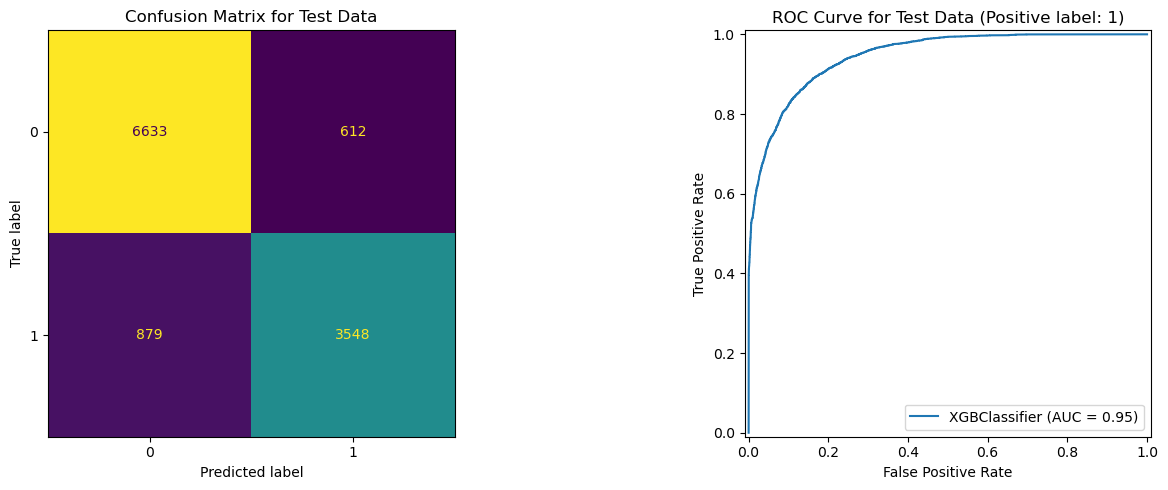

In [11]:
# Evaluate performance
print("XGBoost Classifier Results (before tuning):")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_xgb))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_xgb))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test_xgb))

# Create figure and subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2]})

# Plot confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data')                                     
ax1.grid(False)

# Plot ROC curve for test data and display AUC score 
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax2)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

plt.tight_layout()
plt.show()

In [12]:
# Store the Evaluation Metrics in a single table
result = pd.DataFrame(data=[accuracy_score(y_test, y_pred_test_xgb),
                        precision_score(y_test, y_pred_test_xgb, pos_label=1),
                        recall_score(y_test, y_pred_test_xgb, pos_label=1),
                        f1_score(y_test, y_pred_test_xgb, pos_label=1),
                        roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]),
                        log_loss(y_test, xgb_model.predict_proba(X_test)[:,1])],
                        index=['Accuracy','Precision','Recall','F1-score','AUC','Log loss'],
                        columns = ['xgb_before_tuning'])

result = (result * 100).round(2).astype(str) + '%'
print(result)

          xgb_before_tuning
Accuracy             87.23%
Precision            85.29%
Recall               80.14%
F1-score             82.64%
AUC                  94.62%
Log loss             28.05%


##### With Hyperparameter Tuning (Optuna)

In [14]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)

[I 2025-07-05 22:24:39,081] A new study created in memory with name: no-name-67e74636-843f-4462-97a2-97f3ec9ca3a5
C:\Users\Kun Yang\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:24:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-07-05 22:24:43,986] Trial 0 finished with value: 0.8642208126178639 and parameters: {'n_estimators': 237, 'max_depth': 5, 'learning_rate': 0.07113585585871225, 'subsample': 0.9646069289707899, 'colsample_bytree': 0.9531624526163696}. Best is trial 0 with value: 0.8642208126178639.
C:\Users\Kun Yang\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:24:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-07-05 22:24:47,617] Trial 1 fi

Best params: {'n_estimators': 362, 'max_depth': 9, 'learning_rate': 0.15774369788572667, 'subsample': 0.8575856753872266, 'colsample_bytree': 0.9804861586070704}


C:\Users\Kun Yang\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:27:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Results (After tuning with Optuna):
Train Accuracy: 0.9640777425179772
Test Accuracy: 0.8863091158327622

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7245
           1       0.86      0.83      0.85      4427

    accuracy                           0.89     11672
   macro avg       0.88      0.88      0.88     11672
weighted avg       0.89      0.89      0.89     11672



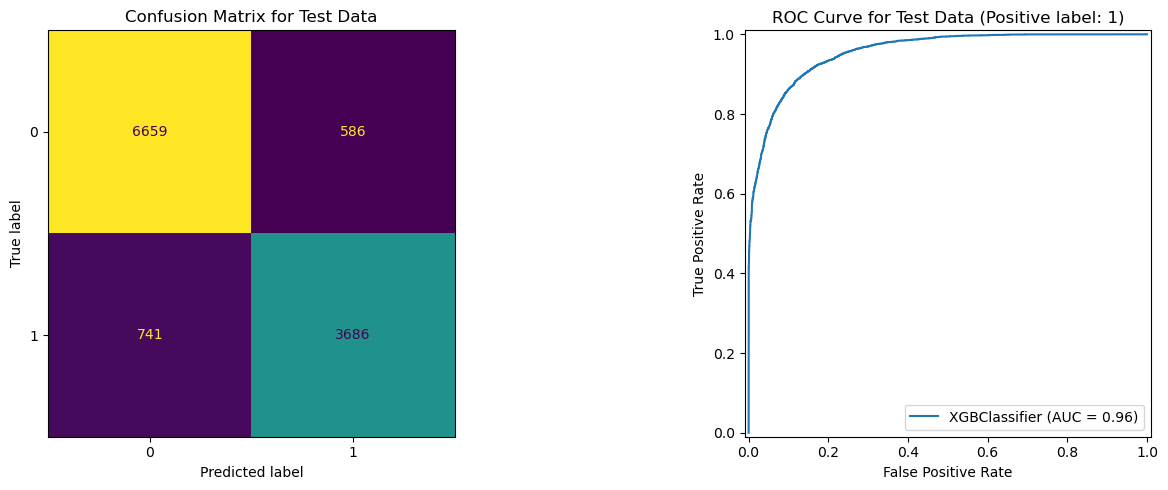

In [15]:
# Re-train XGBoost model using the best hyperparameters found by Optuna
xgb_best_opt = XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_best_opt.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_tuned_xgb = xgb_best_opt.predict(X_train)
y_pred_test_tuned_xgb = xgb_best_opt.predict(X_test)

# Evaluate performance
print("XGBoost Classifier Results (After tuning with Optuna):")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_tuned_xgb))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_tuned_xgb))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test_tuned_xgb))

# Create figure and subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2]})

# Plot confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(xgb_best_opt, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data')                                     
ax1.grid(False)

# Plot ROC curve for test data and display AUC score 
RocCurveDisplay.from_estimator(xgb_best_opt, X_test, y_test, ax=ax2)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

plt.tight_layout()
plt.show()

In [16]:
# Create a list of metric values
new_metrics = [accuracy_score(y_test, y_pred_test_tuned_xgb),
    precision_score(y_test, y_pred_test_tuned_xgb, pos_label=1),
    recall_score(y_test, y_pred_test_tuned_xgb, pos_label=1),
    f1_score(y_test, y_pred_test_tuned_xgb, pos_label=1),
    roc_auc_score(y_test, xgb_best_opt.predict_proba(X_test)[:,1]),
    log_loss(y_test, xgb_best_opt.predict_proba(X_test)[:,1])]

# Append the metric of the tuned model to the result table
result['xgb_after_tuning_optuna'] = new_metrics

result['xgb_after_tuning_optuna'] = (result['xgb_after_tuning_optuna'] * 100).round(2).astype(str) + '%'
print(result)

          xgb_before_tuning xgb_after_tuning_optuna
Accuracy             87.23%                  88.63%
Precision            85.29%                  86.28%
Recall               80.14%                  83.26%
F1-score             82.64%                  84.75%
AUC                  94.62%                   95.6%
Log loss             28.05%                  25.59%


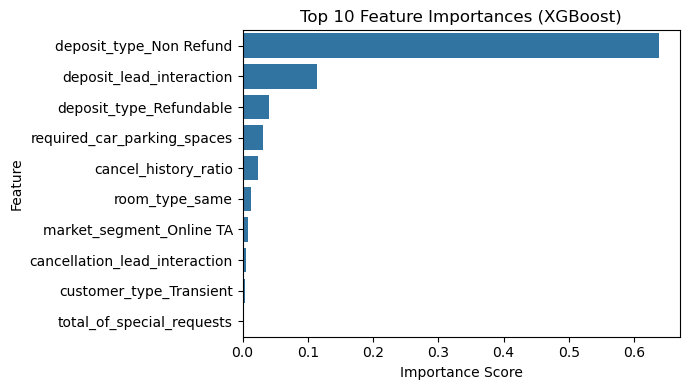

In [17]:
# Get feature importance scores
importances = xgb_best_opt.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance (top 10)
plt.figure(figsize=(7, 4), dpi=100)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

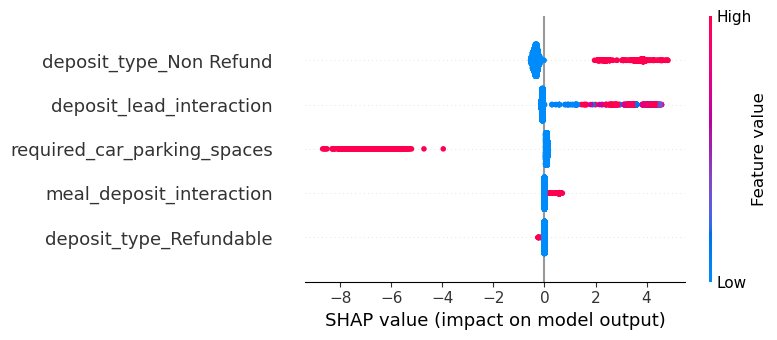

In [18]:
# Create SHAP explainer for the model
explainer = shap.Explainer(xgb_best_opt)

# Compute SHAP values for the test data
shap_values = explainer(X_test)

# List of top 5 features based on earlier feature importance
top_5_features = [
    'deposit_type_Non Refund',
    'deposit_lead_interaction',
    'required_car_parking_spaces',
    'meal_deposit_interaction',
    'deposit_type_Refundable'
]

# Filter SHAP values and test data for the top 5 features
X_test_top5 = X_test[top_5_features]

# Plot SHAP summary (dot plot) for top 5 features
shap.summary_plot(shap_values[:, top_5_features], X_test_top5)

In [32]:
# Export the model as a Pickle File
import pickle

with open('xgb_best_model.pkl', 'wb') as f:
    pickle.dump(xgb_best_opt, f)